# ロジスティック解析
---
ロジスティック回帰による分類予測モデルを構築するために、データ分析をおこなう

### 分析環境構築

In [42]:
# 分析に必要なライブラリをインポート
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
# 可視化ライブラリのインポート
import matplotlib.pyplot as plt
import seaborn as sns

# データセットを読み込む
df = pd.read_csv("../dataset/winequality-red.csv", sep=";")

## 相関関係を調べる
### 散布図を描く
- X軸に目的変数を配置する
- Y軸に求めたい変数との相関性を調べたい説明変数を配置する

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### 品質とアルコール度数の相関関係
- 右肩上がりの図であるから、正の相関関係があるといえる

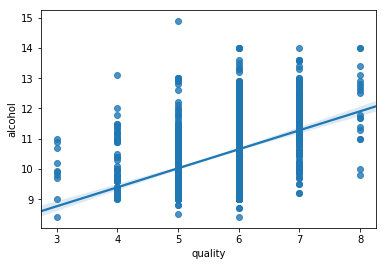

In [10]:
sns.regplot(x="quality", y="alcohol", data=df)

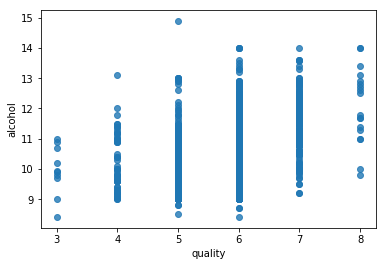

In [11]:
# 線形回帰を非表示
sns.regplot(x="quality", y="alcohol", data=df, fit_reg=False)

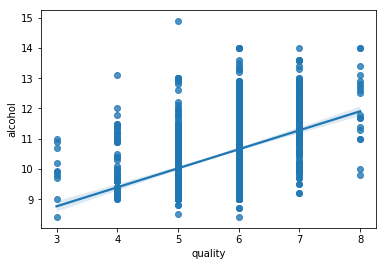

In [12]:
# 回帰直線と信頼区間をデータが存在する区間のみ出力
sns.regplot(x="quality", y="alcohol", data=df, truncate=True)

/Users/h_fukano/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


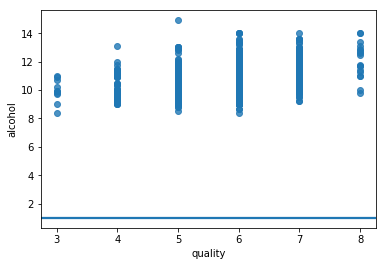

In [13]:
# ロジスティック回帰
sns.regplot(x="quality", y="alcohol", data=df, logistic=True)

[散布図についての参考URL](https://pythondatascience.plavox.info/seaborn/%E6%95%A3%E5%B8%83%E5%9B%B3%E3%83%BB%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB)

## モデリング

### グレード7以上のワインを「美味しいワイン」と定義する

In [30]:
# 関数を作ります。
def delicious_score(x):
    # もしqualityが7以上であれば美味しい(1)
    if x >= 7:
        return 1
    # 7以上でないなれば、美味しくない(0)
    else:
        return 0

# applyを使って、新しい列用のデータを作りましょう。
df['delicious'] = df['quality'].apply(delicious_score)

In [31]:
# 正しく列が追加されたのかを確認する
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,delicious
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [32]:
# 美味しいワインとそうでないワインで説明変数に違いがあるかを確かめる
df.groupby('delicious').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
delicious,,,,,,,,,,,,
0,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828
1,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


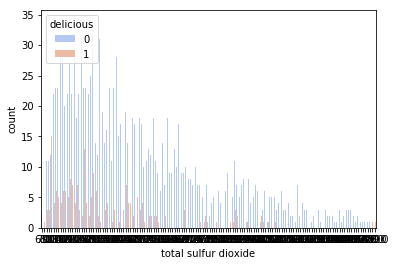

In [24]:
sns.countplot('total sulfur dioxide',data=df,hue='delicious',palette='coolwarm')

### 学習データの作成

In [33]:
# 機械学習用です。
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# もう一つ、性能の評価用に
from sklearn import metrics

In [34]:
# 教師データの作成
Y = df["delicious"]
X = df.drop(["delicious", "quality"], axis=1)

In [35]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: delicious, dtype: int64

In [36]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## ScikitLearnを使ったロジスティック回帰

In [37]:
# LogisticRegressionクラスのインスタンスを作ります。
log_model = LogisticRegression() # fit_intercept=False, C=1e9) statsmodelsの結果に似せるためのパラメータ。

# データを使って、モデルを作ります。
log_model.fit(X,Y)

# モデルの精度を確認してみましょう。
log_model.score(X,Y)

0.8792995622263915

In [38]:
# numpyのarrayなので、平均をすぐ計算できます。
Y.mean()

0.1357098186366479

どの変数が予測に寄与しているか、見ていく

In [45]:
# 変数名とその係数を格納するDataFrameを作ります。
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T

coeff_df

,0,1
0,fixed acidity,-0.0638355
1,volatile acidity,-2.76956
2,citric acid,0.257014
3,residual sugar,0.102341
4,chlorides,-1.57629
5,free sulfur dioxide,0.0139165
6,total sulfur dioxide,-0.0172194
7,density,-1.43782
8,pH,-2.52949
9,sulphates,2.15475


### 学習とテスト

In [46]:
# おなじく、train_test_splitを使います。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# 新しいモデルを作ります。
log_model2 = LogisticRegression()

# 学習用のデータだけでモデルを鍛えます。
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

predictメソッドを使って、予測を試みます。

In [47]:
# テスト用データを使って、予測してみましょう。
class_predict = log_model2.predict(X_test)

# 精度を計算してみます。
print(metrics.accuracy_score(Y_test,class_predict))

0.87


[Lec76-79_ロジスティック回帰](http://www.tsjshg.info/udemy/Lec76-79.html)